<a href="https://colab.research.google.com/github/LeoPich/Projects/blob/main/Classified%20five%20cancer%20types%20from%20gene%20expression%20dataipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Adresse des deux fichiers de donnees
# https://drive.google.com/drive/folders/14ZtZtNNZX3O8LSjIoVSOkYdJkaW68evL

import numpy as np


etudiant = 74909311 # nombre à  remplacer par votre numéro d'etudiant
np.random.seed(etudiant)

# On lit la premiere ligne pour obtenir le nombre de colonnes
X = np.loadtxt("data.csv",max_rows=1,delimiter=",",dtype=str)
nvars=len(X)-1

# Lecture des donnees correpondant a la moitie des individus.
print("Sont lues les donnees correpondant aux trois quarts des individus",
      "(tiree aleatoirement sur la base de votre numero d'etudiant)")
X = np.loadtxt("data.csv",skiprows=1,delimiter=",", usecols=range(1,nvars))
nech=3*X.shape[0]//4
y =np.loadtxt("labels.csv",delimiter=",",skiprows=1,dtype=str)
per=np.random.permutation(X.shape[0])[:nech]
X,y = X[per,:], y[per,1]
print("Nombre de lignes, nombre de colonnes : ",X.shape)

# Elimination des variables constantes
l=np.std(X,axis=0)>1.e-8
X=X[:,l]
print("Nombre de lignes et colonnes, apres elimination des variables constantes: ",X.shape)

print(X)


N'oubliez pas de mettre votre numero d'etudiant
Sont lues les donnees correpondant aux trois quarts des individus (tiree aleatoirement sur la base de votre numero d'etudiant)


420
(420, 20531)
['0.0' '2.01720929003' '3.26552691165' ... '8.92132623446' '5.28675919351'
 '0.0']
['PRAD' 'LUAD' 'PRAD' 'BRCA' 'PRAD' 'BRCA' 'KIRC' 'BRCA' 'KIRC' 'KIRC'
 'BRCA' 'BRCA' 'KIRC' 'LUAD' 'BRCA' 'BRCA' 'BRCA' 'BRCA' 'KIRC' 'BRCA'
 'LUAD' 'BRCA' 'BRCA' 'KIRC' 'KIRC' 'PRAD' 'BRCA' 'LUAD' 'BRCA' 'LUAD'
 'PRAD' 'BRCA' 'COAD' 'KIRC' 'LUAD' 'KIRC' 'LUAD' 'PRAD' 'PRAD' 'KIRC'
 'BRCA' 'BRCA' 'LUAD' 'COAD' 'BRCA' 'BRCA' 'BRCA' 'BRCA' 'KIRC' 'BRCA'
 'PRAD' 'BRCA' 'BRCA' 'PRAD' 'BRCA' 'KIRC' 'BRCA' 'KIRC' 'KIRC' 'COAD'
 'PRAD' 'BRCA' 'PRAD' 'KIRC' 'KIRC' 'LUAD' 'KIRC' 'BRCA' 'KIRC' 'LUAD'
 'BRCA' 'LUAD' 'BRCA' 'KIRC' 'BRCA' 'BRCA' 'KIRC' 'LUAD' 'PRAD' 'BRCA'
 'LUAD' 'BRCA' 'BRCA' 'BRCA' 'PRAD' 'LUAD' 'LUAD' 'KIRC' 'BRCA' 'PRAD'
 'COAD' 'KIRC' 'BRCA' 'KIRC' 'LUAD' 'LUAD' 'BRCA' 'BRCA' 'PRAD' 'KIRC'
 'COAD' 'KIRC' 'BRCA' 'PRAD' 'LUAD' 'LUAD' 'KIRC' 'PRAD' 'BRCA' 'BRCA'
 'BRCA' 'LUAD' 'KIRC' 'KIRC' 'PRAD' 'BRCA' 'PRAD' 'BRCA' 'LUAD' 'BRCA'
 'PRAD' 'BRCA' 'BRCA' 'BRCA' 'LUAD' 'KIRC' 'LUAD

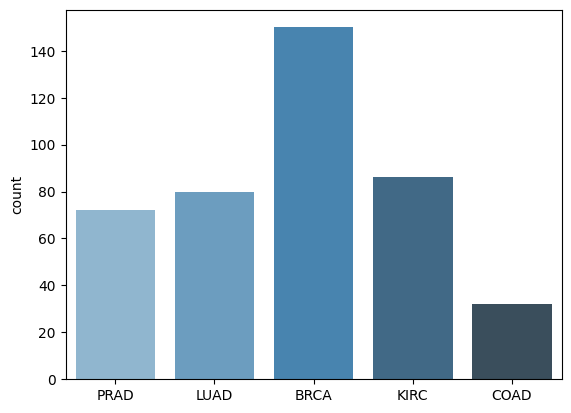

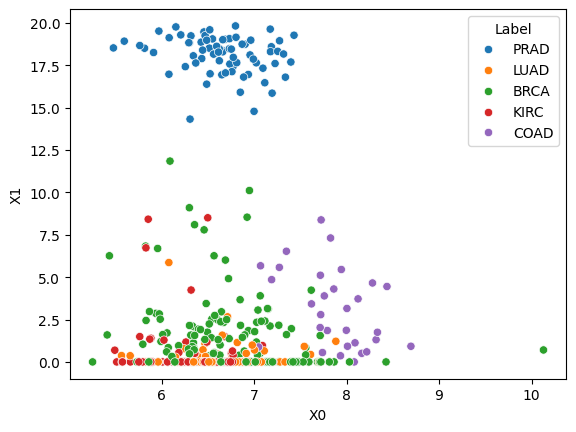

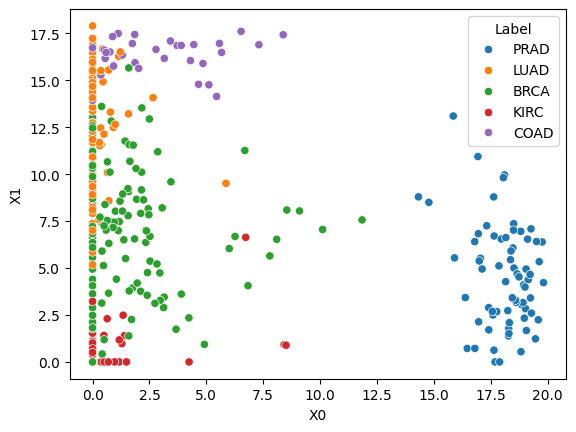

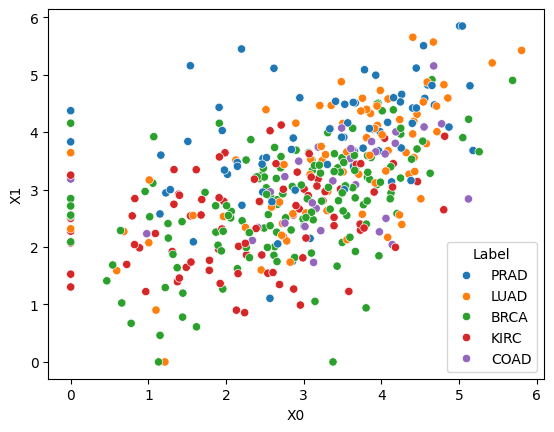

Il y a 420 échantillons et 20531 gênes étudiés.
72 80 150 86 32 420


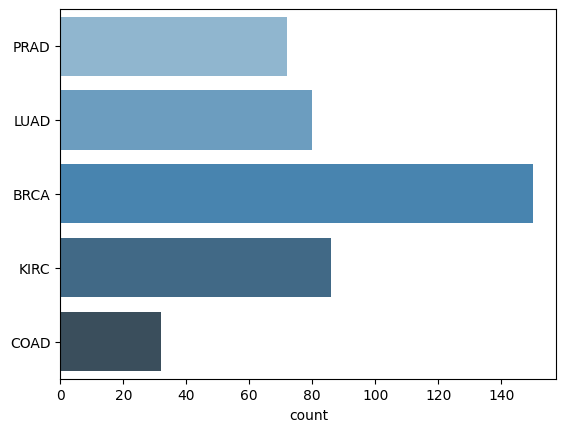

(420, 2)
(420,)


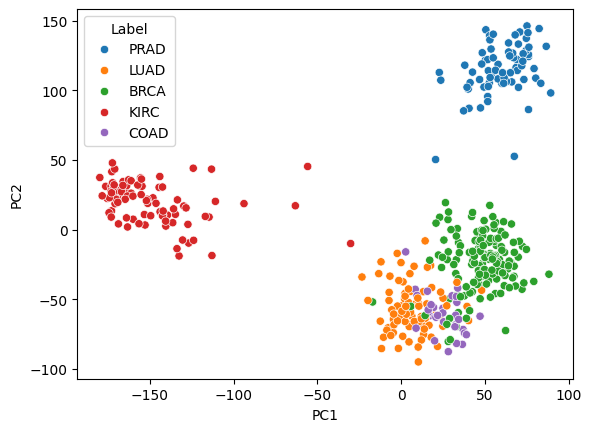

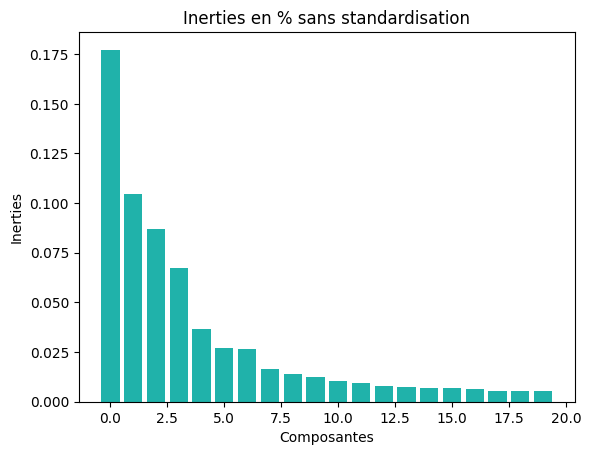

In [ ]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import pstdev, variance, pvariance,stdev, mean
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import  linkage, fcluster
from sklearn.cluster import  KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score,f1_score,make_scorer
import warnings
warnings.filterwarnings('ignore')

nb_binome = 74909311 # nombre à remplacer par votre numéro de binome
np.random.seed(nb_binome)

n  = 801
p = 0.5
Keeprows = np.where(np.random.uniform(size=(n-1))<p)[0]
print(len(Keeprows))
data_origine = np.loadtxt("data.csv",delimiter=",",dtype=str)
data = data_origine[1:,1:]
data=data[Keeprows]
X=np.zeros(data.shape)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        X[i,j]=float(data[i,j])
#print(X)

print(data.shape)

label =  np.loadtxt("labels.csv",delimiter=",",skiprows=1,usecols=[1],dtype=str)
label=label[Keeprows]



print(data[0])
print(label)

sns.countplot(x=label,palette="Blues_d")



### Comprehension des données --------------------------------------------------


### couple qui marche (9176,3540) , (2,3), (3,9176)
plt.figure()
d = {'X0': X[:,3], 'X1': X[:,9176], 'Label':label}
df = pd.DataFrame(data=d)

sns.scatterplot(x="X0",y="X1",hue="Label",data = df)
plt.show()

plt.figure()
d = {'X0': X[:,9176], 'X1': X[:,3540], 'Label':label}
df = pd.DataFrame(data=d)

sns.scatterplot(x="X0",y="X1",hue="Label",data = df)
plt.show()

plt.figure()
d = {'X0': X[:,1], 'X1': X[:,2], 'Label':label}
df = pd.DataFrame(data=d)

sns.scatterplot(x="X0",y="X1",hue="Label",data = df)
plt.show()
### taille des données

#print("Nombre de lignes, nombre de colonnes : ",data.shape)
n_ech=data.shape[0]
n_gen=data.shape[1]
print("Il y a "+str(n_ech)+" échantillons et "+str(n_gen)+" gênes étudiés.")

### variance des données
VarX=[variance(X[:,j]) for j in range(X.shape[1])]
MeanX=[mean(X[:,j]) for j in range(X.shape[1])]


#Répartition PRAD - LUAD - BRCA - KIRC - COAD
def repartition():
    P,L,B,K,C=0,0,0,0,0
    for u in label:
        if u=='PRAD':
            P+=1
        elif u=='LUAD':
            L+=1
        elif u=='BRCA':
            B+=1
        elif u=='KIRC':
            K+=1
        else:
            C+=1
    print(P,L,B,K,C,n_ech)


repartition()
### Repartition des classes dans l'echantillon
plt.figure()
sns.countplot(label,palette="Blues_d")
plt.show()
### ACP et representation dans le plan des 2 premiers composantes principales ----
pca = PCA(n_components=2)
pca.fit(X)

PC = pca.transform(X)
print(PC.shape)
print(label.shape)

d = {'PC1': PC[:,0], 'PC2': PC[:,1], 'Label':label}
df = pd.DataFrame(data=d)

sns.scatterplot(x="PC1",y="PC2",hue="Label",data = df)
#ACP
n_comp=20

scaler = StandardScaler(with_mean=True,with_std=False)
scaler.fit(data)
Xs = scaler.transform(data)
pca = PCA(n_components=n_comp)
pca.fit(Xs)
inerties = pca.explained_variance_ratio_

plt.figure()
plt.bar(np.arange(n_comp),inerties,color='lightseagreen')
plt.xlabel("Composantes")
plt.ylabel("Inerties")
plt.title('Inerties en %'+' sans '+'standardisation')
plt.show()







In [ ]:
print(sum(inerties))

0.6414266189931095


 
 #### LDA SUR LES 5 CLASSES #### 

Taux d'erreur:  0.007


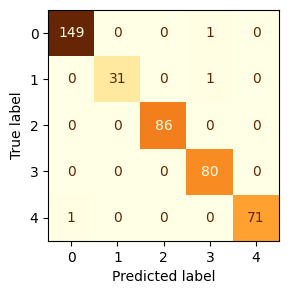

taux de bien prédits en moyenne: 0.9976190476190476
 
 #### LDA SUR LES 5 CLASSES (train/test) #### 

Taux d'erreur:  0.014


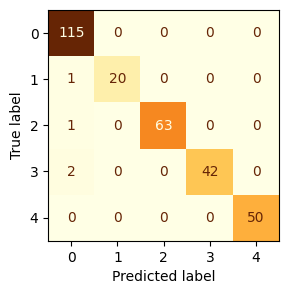

taux de bien prédits en moyenne: 0.993103448275862
### KPPV ####
Confusion matrix : 
[[111   0   0   3   1]
 [  1  20   0   0   0]
 [  1   0  63   0   0]
 [  1   0   0  43   0]
 [  0   0   0   0  50]]
Accuracy :  0.976
F1-score :  0.976
Erreurs moyennes :  [0.99206349 0.99206349 0.93650794 0.99206349]
Ecart-types des erreurs :  [0.01122392 0.01122392 0.01122392 0.01122392]
Confusion matrix : 
[[112   0   0   3   0]
 [  0  20   0   1   0]
 [  0   0  63   1   0]
 [  1   0   0  43   0]
 [  2   0   0   0  48]]
Accuracy :  0.973
F1-score BRCA:  0.973
precision_score BRCA:  0.974
recall_score:  0.973


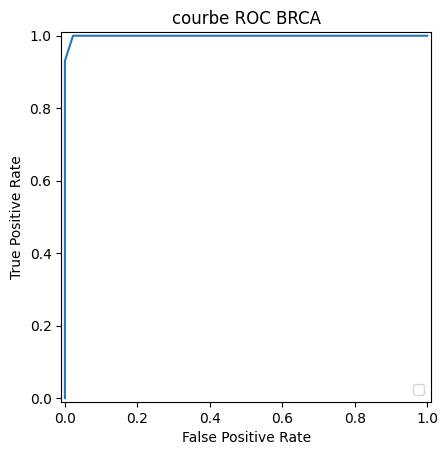

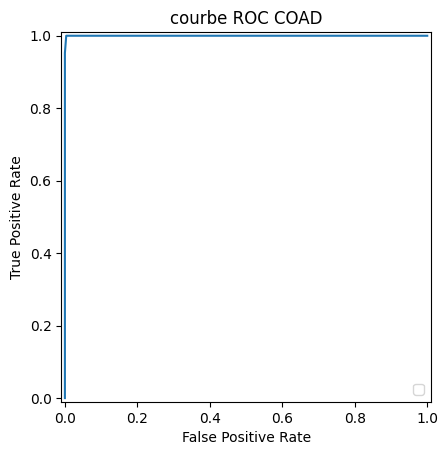

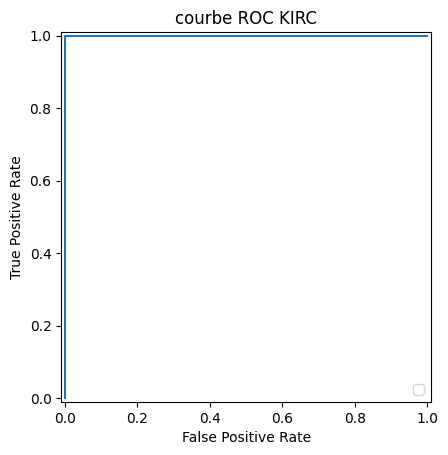

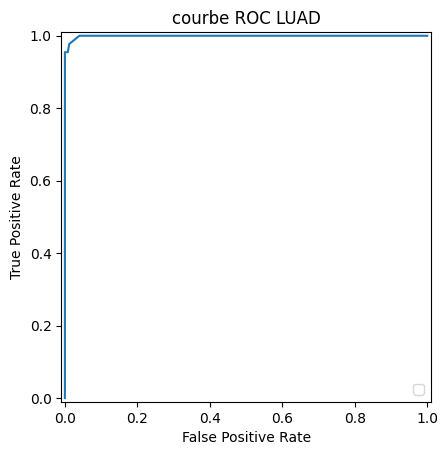

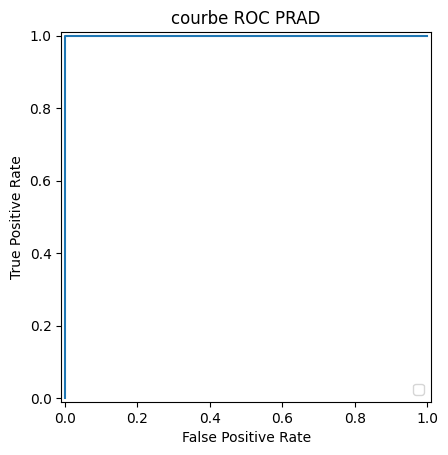

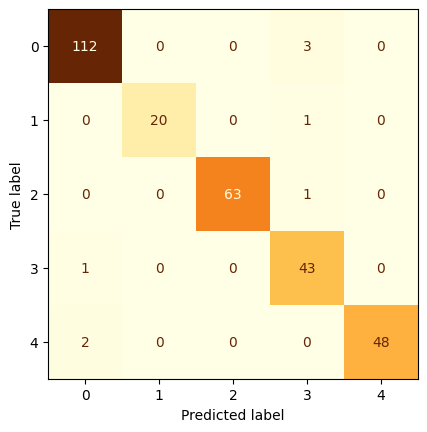

In [ ]:
np.random.seed(nb_binome)
### LDA Suffisante pour classifier???---------------------------------------------
## On effectue la LDA
print(' \n #### LDA SUR LES 5 CLASSES #### \n')
lda = LinearDiscriminantAnalysis()
lda.fit(X,label)#
yhat = lda.predict(X)#
errl=sum(label!=yhat)/len(label) #
print("Taux d'erreur: ",round(errl,3))
plt.rcParams.update({'figure.figsize': (3,3),'font.size': 10})
conf_mat =  confusion_matrix(label,yhat) #
ConfusionMatrixDisplay(conf_mat).plot(cmap='YlOrBr',colorbar=False)
plt.show()
plt.rcdefaults()

score=cross_val_score(lda, X,label,cv=10) #
print("taux de bien prédits en moyenne:",np.mean(score))

### Sur echantillon train/test


X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.7, random_state=42)

print(' \n #### LDA SUR LES 5 CLASSES (train/test) #### \n')
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)#
yhat = lda.predict(X_test)#
errl=sum(y_test!=yhat)/len(y_test) #
print("Taux d'erreur: ",round(errl,3))
plt.rcParams.update({'figure.figsize': (3,3),'font.size': 10})
conf_mat =  confusion_matrix(y_test,yhat) #
ConfusionMatrixDisplay(conf_mat).plot(cmap='YlOrBr',colorbar=False)
plt.show()
plt.rcdefaults()

score=cross_val_score(lda, X_test,y_test,cv=10) #
print("taux de bien prédits en moyenne:",np.mean(score))


### KPPV --------------------------------------------------------------------------
print('### KPPV ####')
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_sc,y_train)
y_pred = knn.predict(X_test_sc)

print("Confusion matrix : ")
print(confusion_matrix(y_test[:],y_pred[:]))

from sklearn.metrics import f1_score
print("Accuracy : ",np.round(accuracy_score(y_test,y_pred),3))
print("F1-score : ",np.round(f1_score(y_test,y_pred,average='weighted'),3)) #,pos_label="'LUAD'"

from sklearn.metrics import RocCurveDisplay
n0 = 1000
from sklearn.metrics import roc_curve
y_score = y_pred = knn.predict_proba(X_test_sc[:,:])
for i in range(len(knn.classes_)):
    fpr, tpr, _ = roc_curve(y_test[:], y_score[:,i], pos_label=knn.classes_[i])
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.title('courbe ROC '+str(knn.classes_[i]))

# selection du meilleur nb de voisin
n_neighbors = [1,5,20,10]
res = []
for nn in n_neighbors:
   res.append(cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=nn),X_train_sc, y_train,cv = 3,n_jobs = -1))
np.array(res)
print("Erreurs moyennes : ", np.mean(np.array(res),axis=1))
print("Ecart-types des erreurs : ", np.std(np.array(res),axis=1))

### meilleur c'est 1

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_sc,y_train)
y_pred = knn.predict(X_test_sc)

print("Confusion matrix : ")
print(confusion_matrix(y_test[:],y_pred[:]))

print("Accuracy : ",np.round(accuracy_score(y_test,y_pred),3))
print("F1-score: ",np.round(f1_score(y_test,y_pred,average='weighted'),3)) #,pos_label="'BRCA'"
print("precision_score : ",np.round(precision_score(y_test,y_pred,average='weighted'),3)) #,pos_label="'BRCA'"
print("recall_score: ",np.round(recall_score(y_test,y_pred,average='weighted'),3)) #,pos_label="'BRCA'""

ConfusionMatrixDisplay(confusion_matrix(y_test[:],y_pred[:])).plot(cmap='YlOrBr',colorbar=False)
plt.show()





### arbre sur echantillon train/test ###


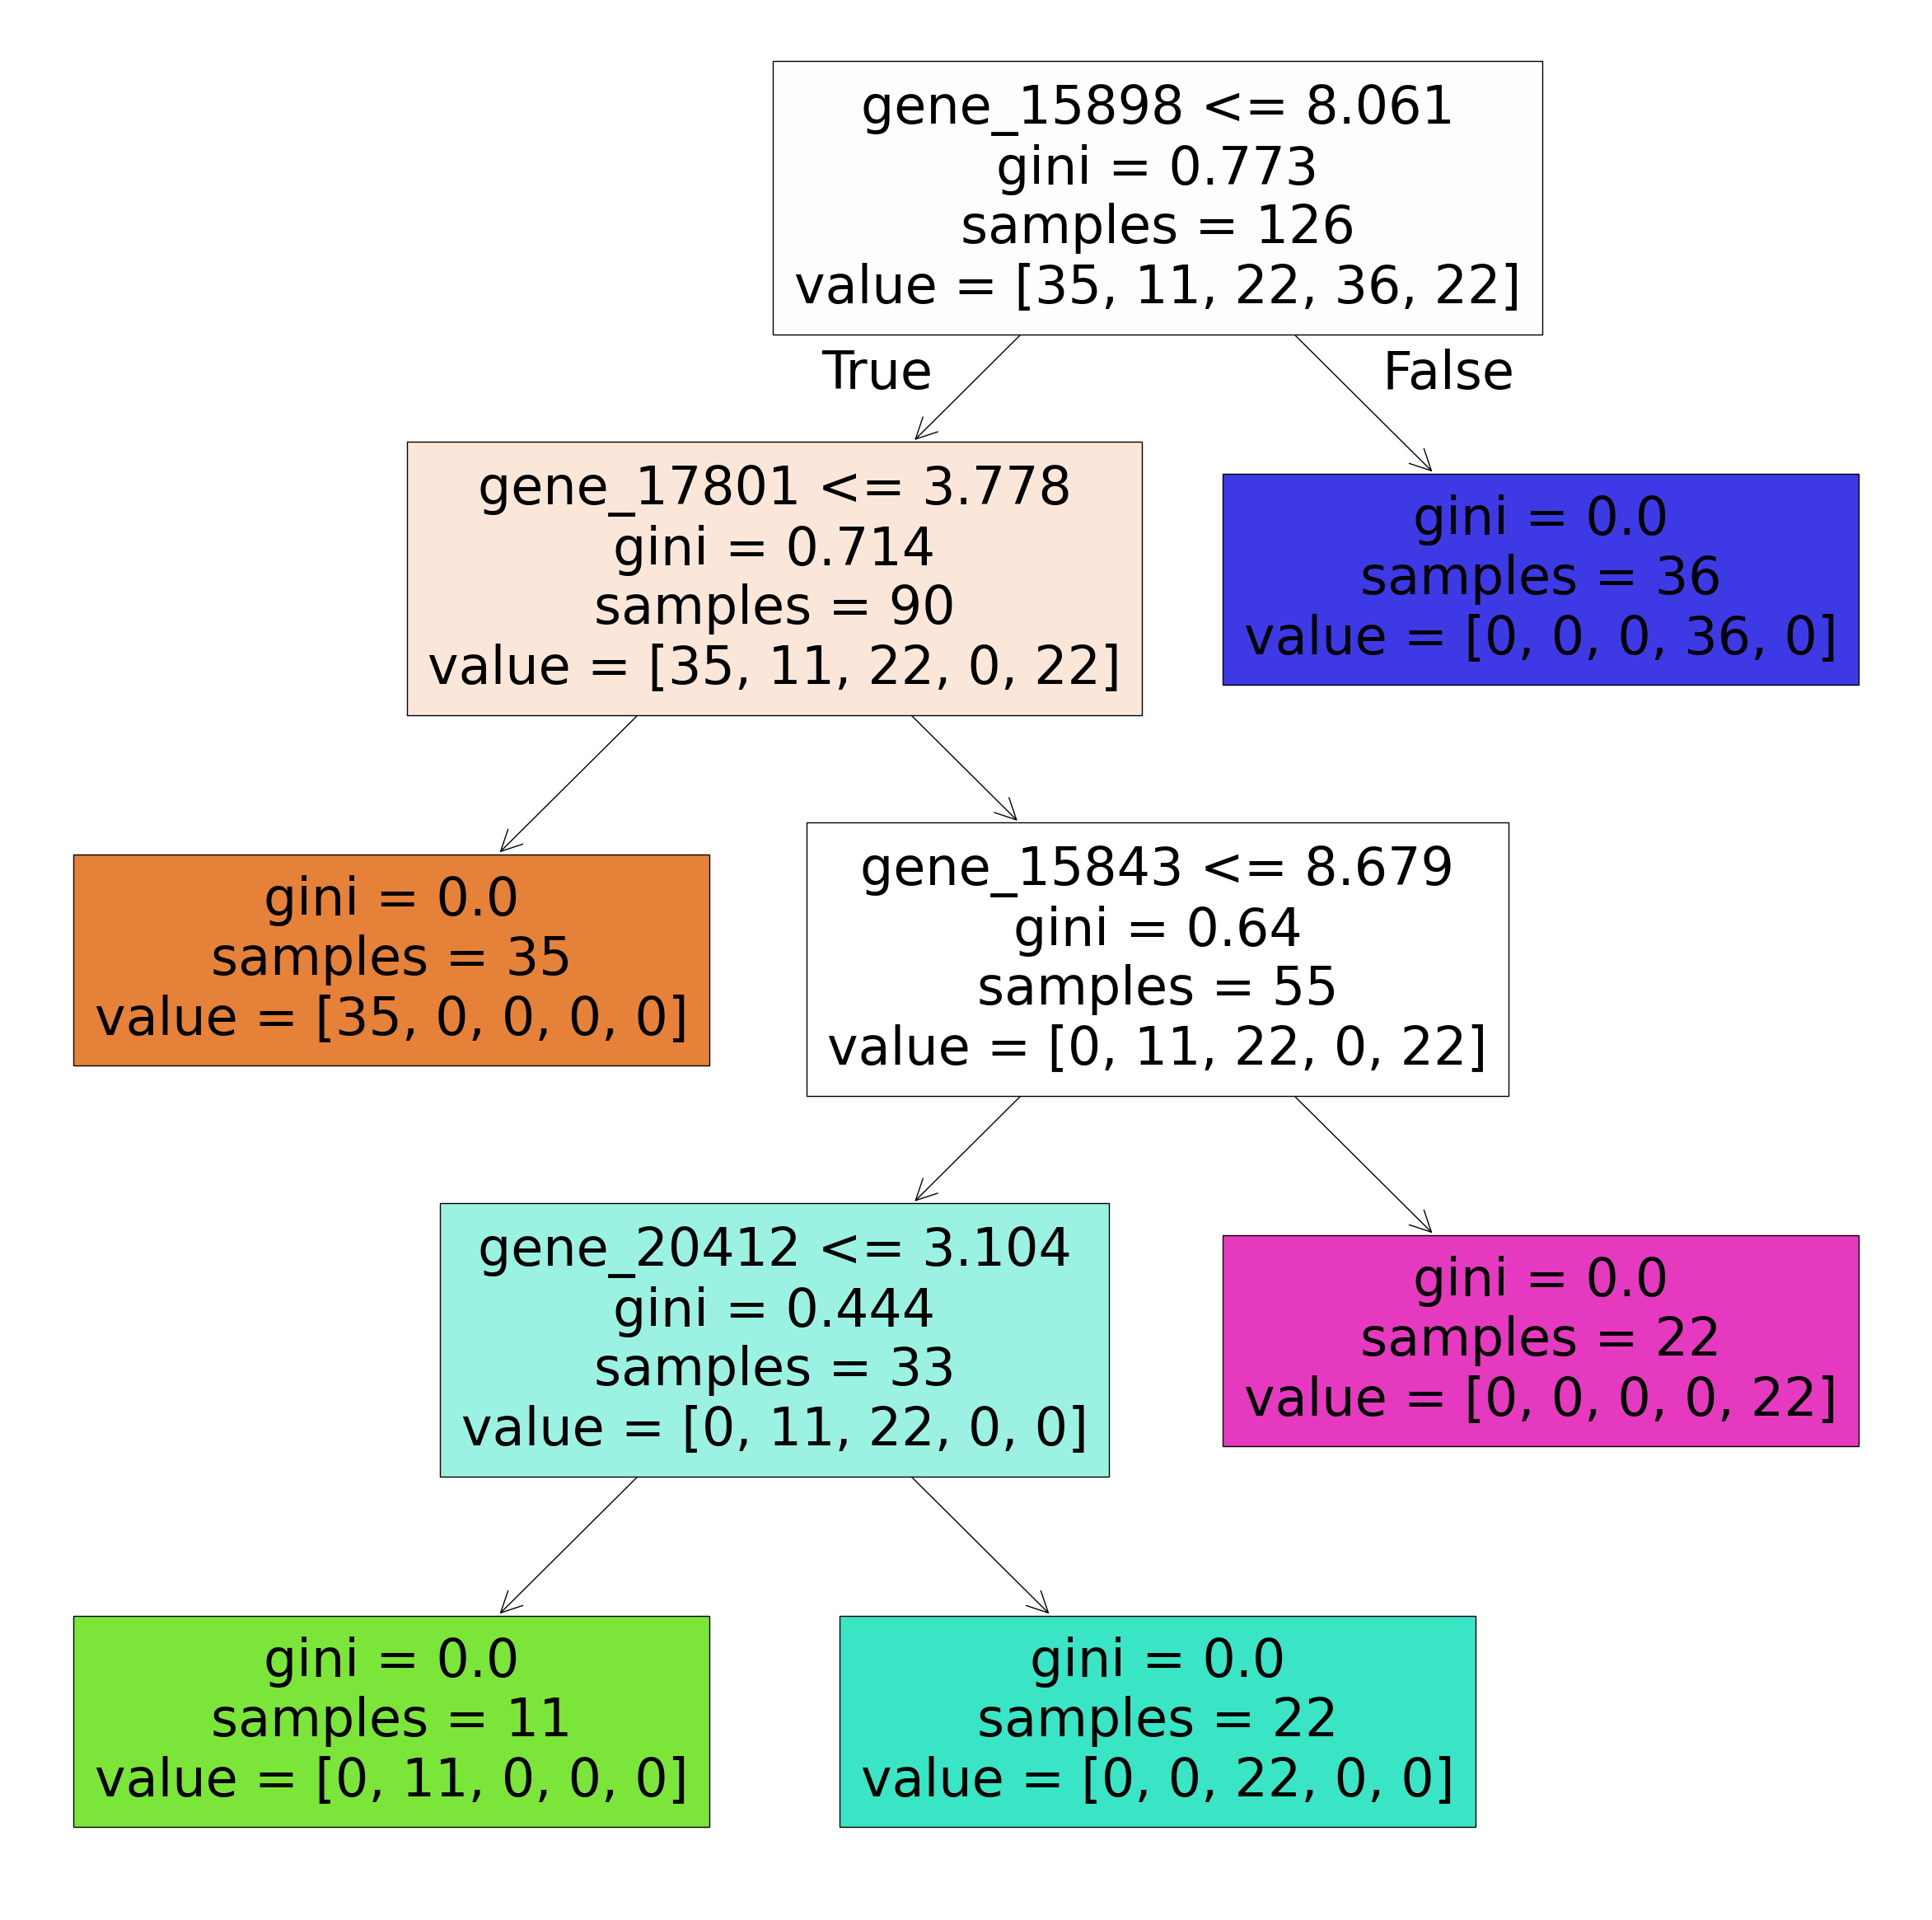

Confusion matrix  : 
[[111   0   0   3   1]
 [  3  14   4   0   0]
 [  6   0  56   1   1]
 [  2   0   0  42   0]
 [  1   0   2   0  47]]
 
Confusion matrix (proportions) : 
[[0.97 0.   0.   0.03 0.01]
 [0.14 0.67 0.19 0.   0.  ]
 [0.09 0.   0.88 0.02 0.02]
 [0.05 0.   0.   0.95 0.  ]
 [0.02 0.   0.04 0.   0.94]]
 
Accuracy :  0.918
F1-score BRCA:  0.917
precision_score BRCA:  0.921
recall_score:  0.918


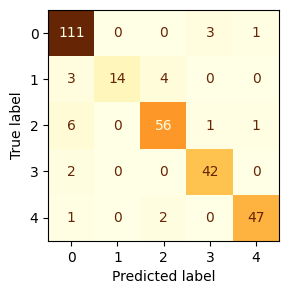

### arbre sur toutes les données ###


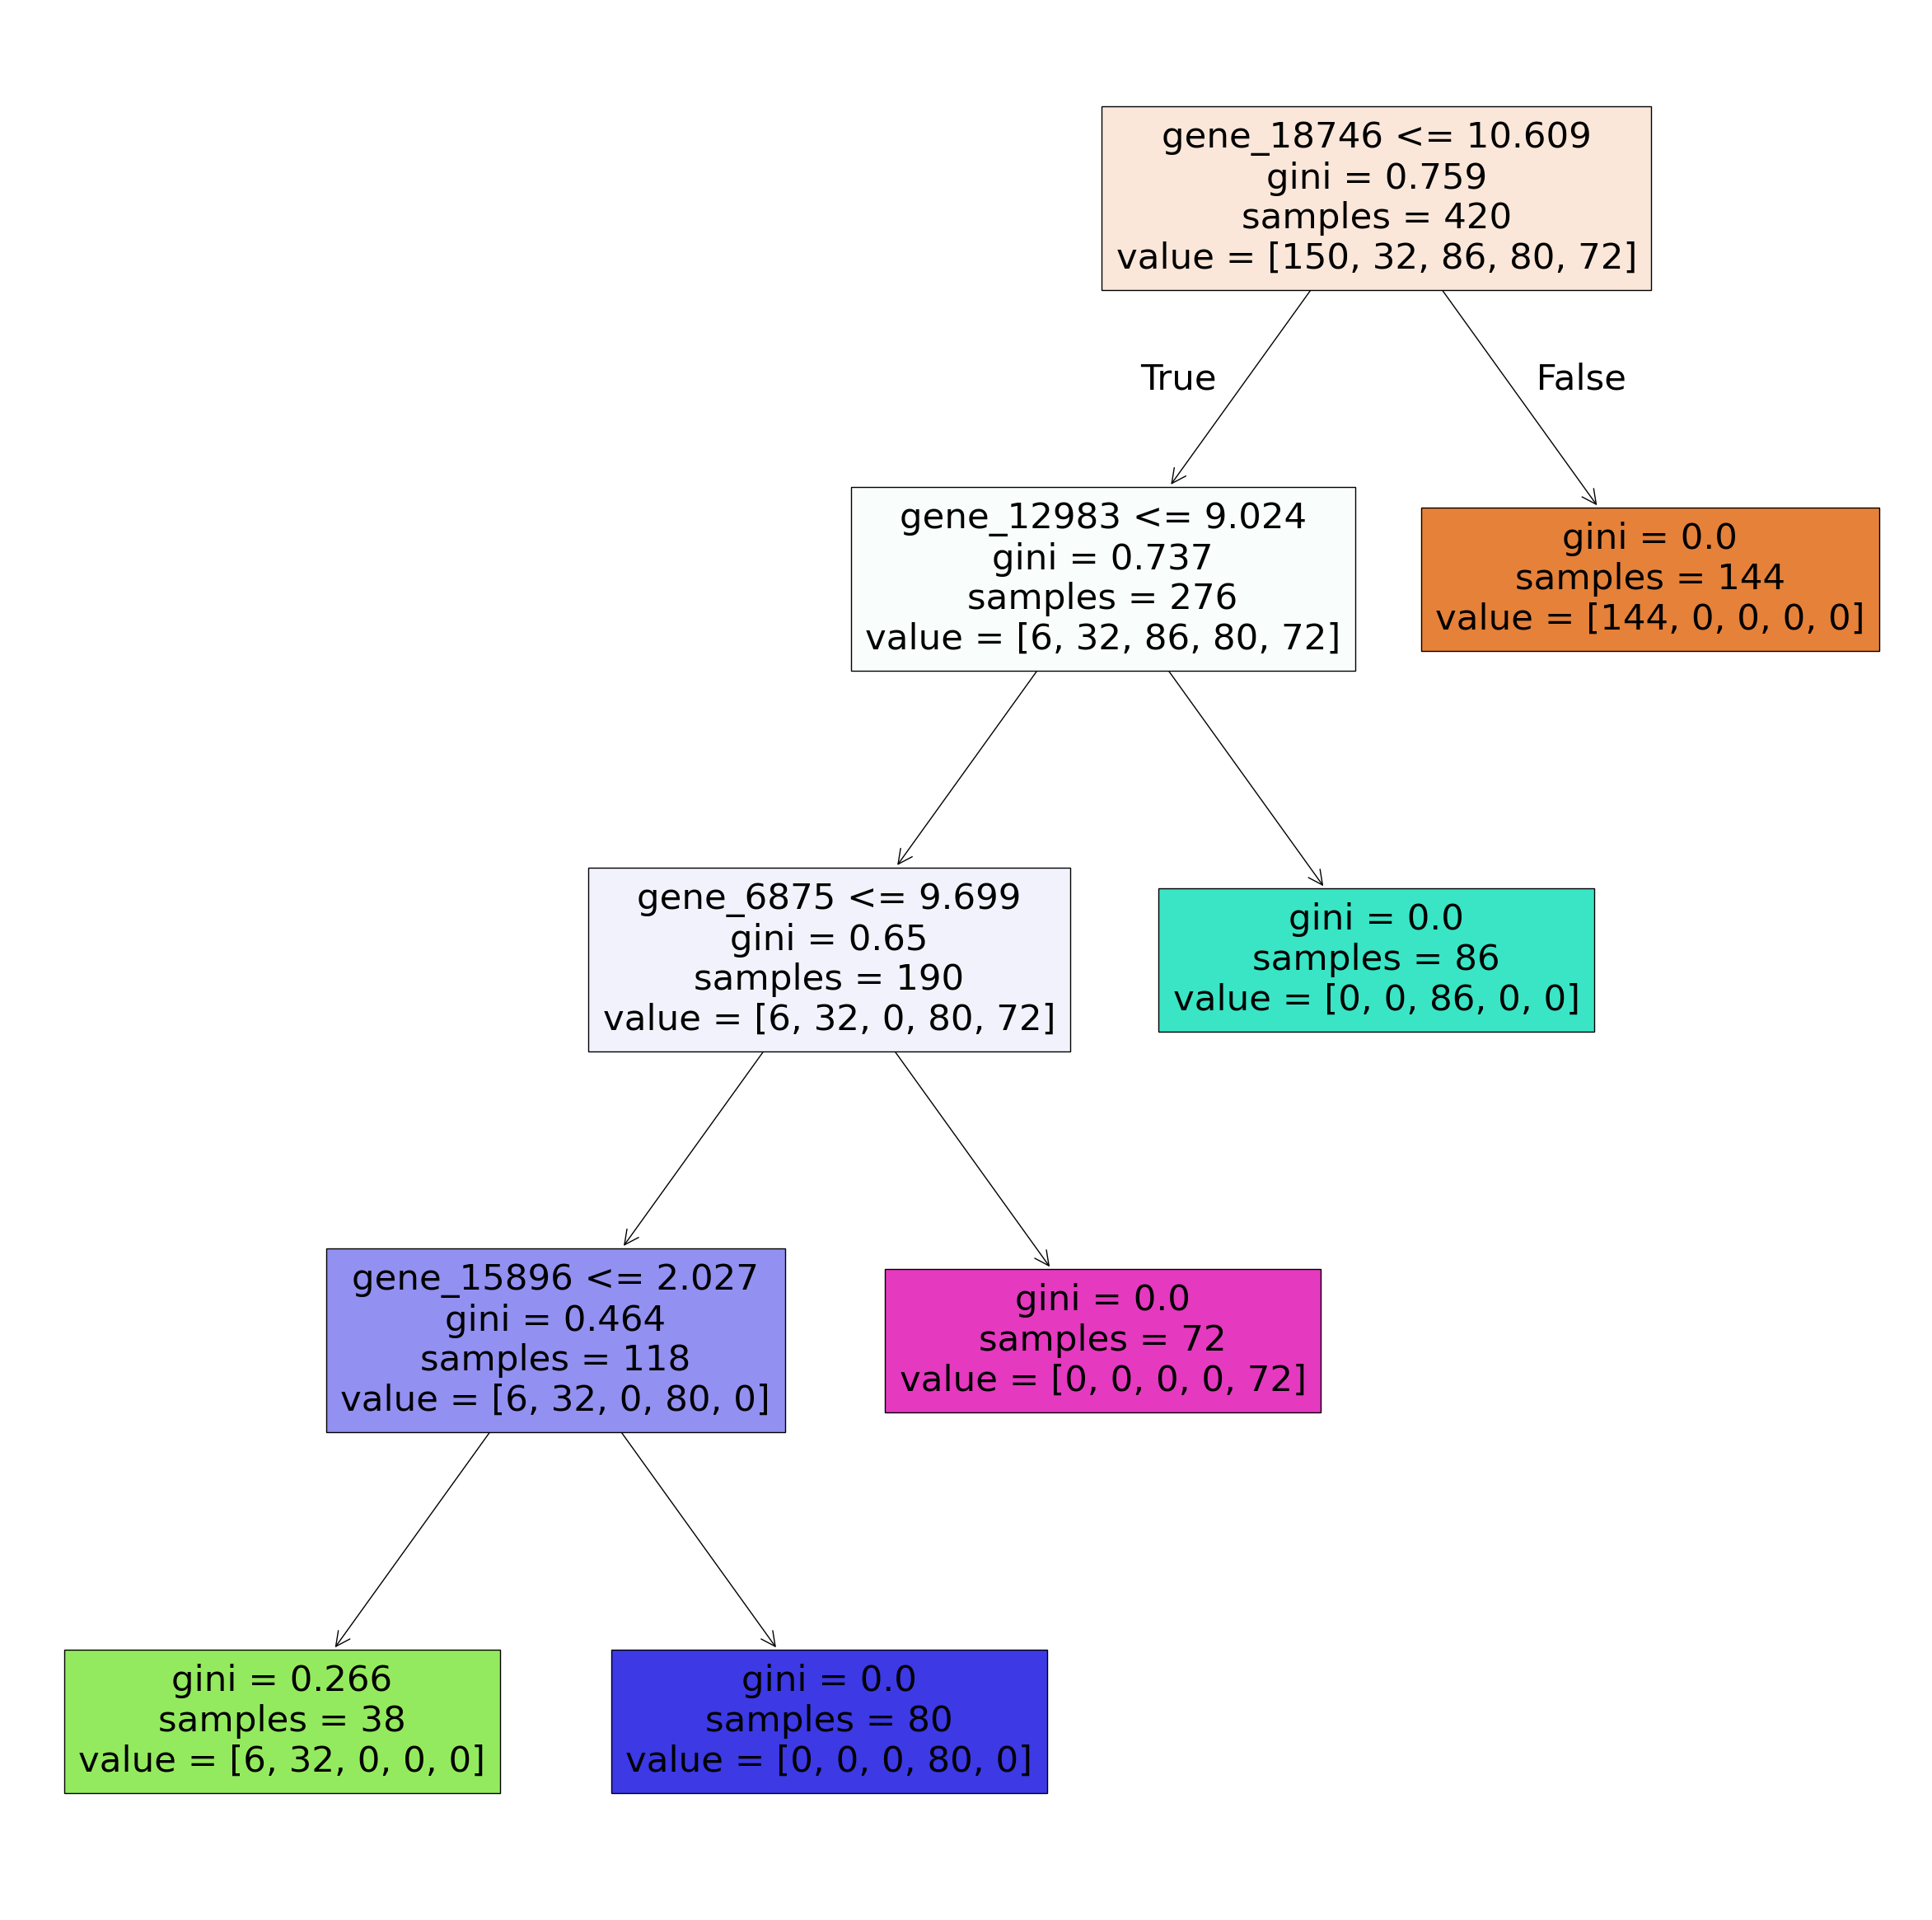

Meilleur modèle
DecisionTreeClassifier(max_depth=12, max_features=14, min_samples_leaf=4)


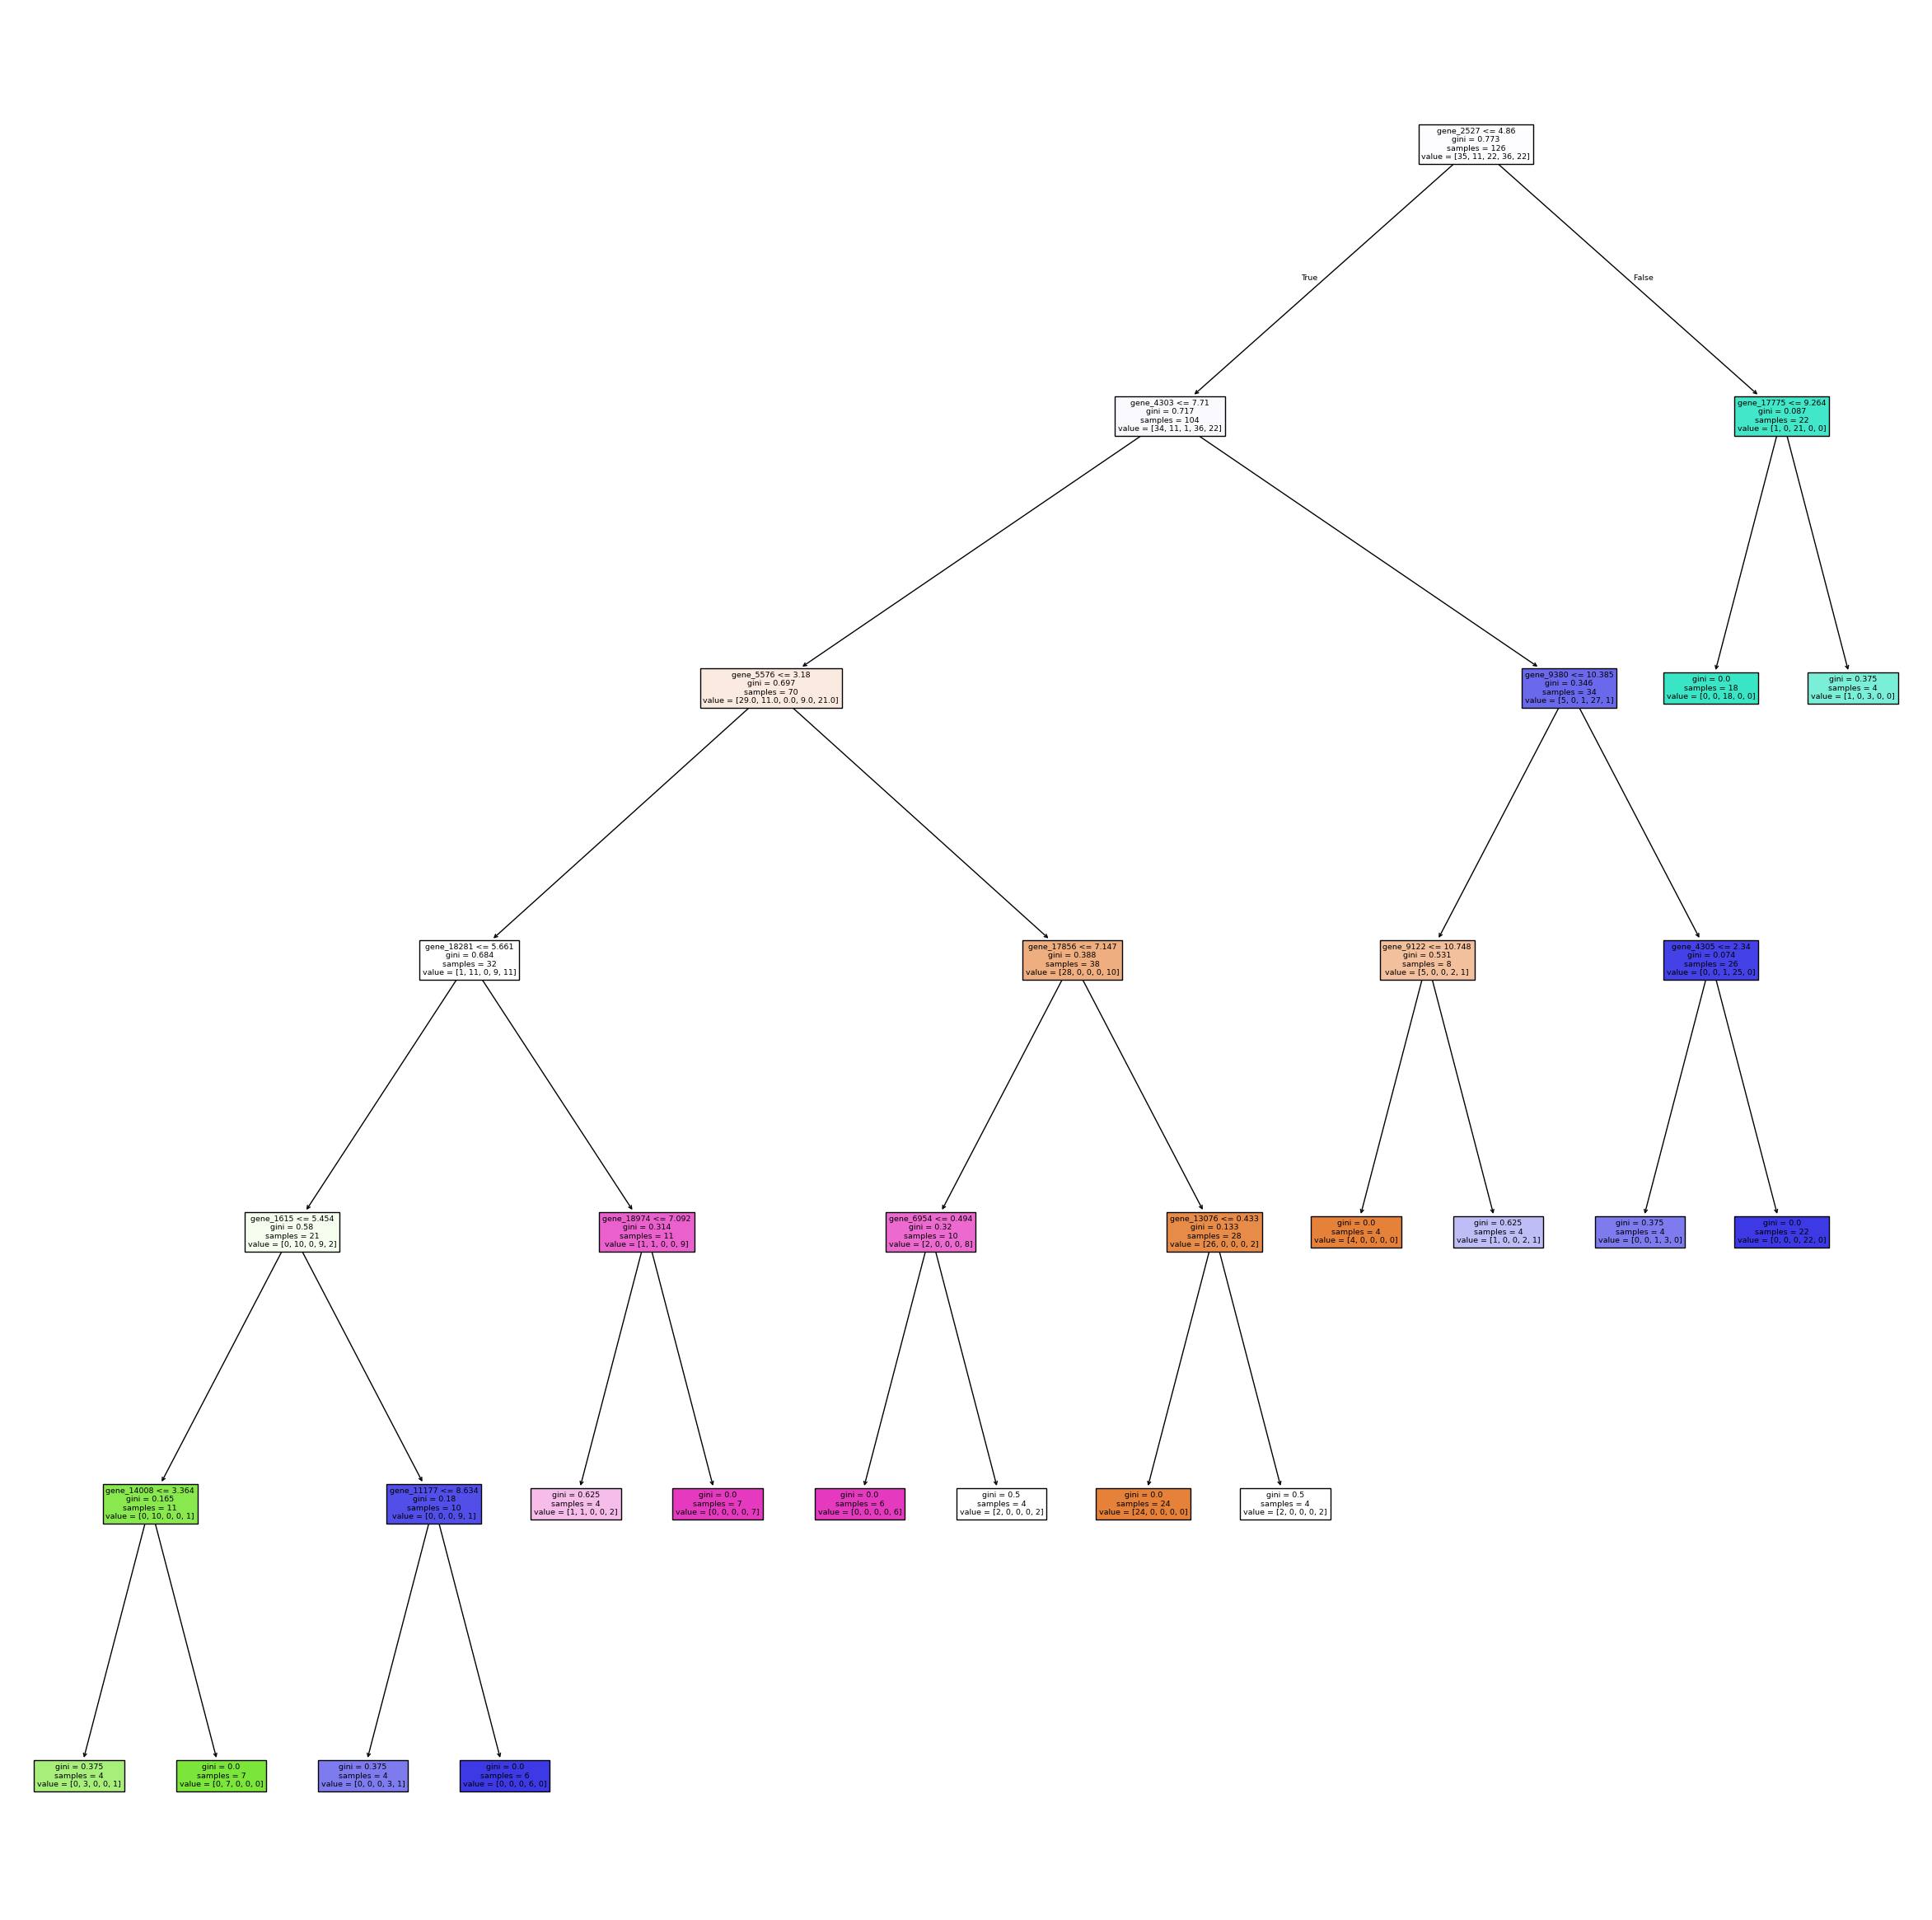

Confusion matrix  : 
[[78  4  2 19 12]
 [ 3 16  0  2  0]
 [12  0 44  7  1]
 [ 5  6  2 27  4]
 [14  3  1  3 29]]
 
Confusion matrix (proportions) : 
[[0.68 0.03 0.02 0.17 0.1 ]
 [0.14 0.76 0.   0.1  0.  ]
 [0.19 0.   0.69 0.11 0.02]
 [0.11 0.14 0.05 0.61 0.09]
 [0.28 0.06 0.02 0.06 0.58]]
 


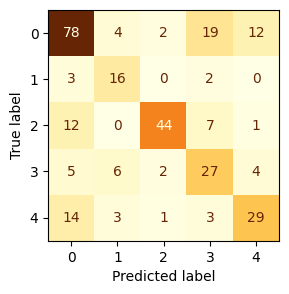

Accuracy :  0.66
F1-score BRCA:  0.666
precision_score BRCA:  0.684
recall_score:  0.66


<Axes: xlabel='X0', ylabel='X1'>

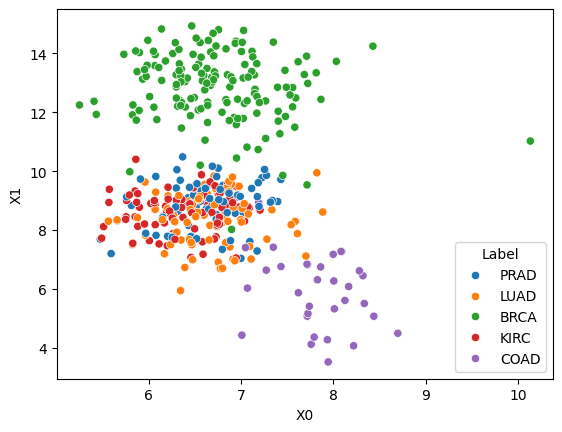

In [ ]:
np.random.seed(nb_binome)
### Arbre -------------------------------------------------------------------------

print('### arbre sur echantillon train/test ###')
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)

plt.figure(figsize=(30,30))
plot_tree(clf,filled=True, feature_names=data_origine[0,1:])
plt.show()

y_pred_clf = clf.predict(X_test)
print("Confusion matrix  : ")
print(confusion_matrix(y_test,y_pred_clf))
print(' ')
print("Confusion matrix (proportions) : ")
cm = confusion_matrix(y_test,y_pred_clf,normalize='true')
print(np.round(cm,2))
print(' ')

print("Accuracy : ",np.round(accuracy_score(y_test,y_pred_clf),3))
print("F1-score BRCA: ",np.round(f1_score(y_test,y_pred_clf,average='weighted'),3)) #pos_label="'BRCA'"
print("precision_score BRCA: ",np.round(precision_score(y_test,y_pred_clf,average='weighted'),3)) #pos_label="'BRCA'"
print("recall_score: ",np.round(recall_score(y_test,y_pred_clf,average='weighted'),3)) #pos_label="'BRCA'"

plt.rcParams.update({'figure.figsize': (3,3),'font.size': 10})
conf_mat =  confusion_matrix(y_test,y_pred_clf) #
ConfusionMatrixDisplay(conf_mat).plot(cmap='YlOrBr',colorbar=False)
plt.show()
plt.rcdefaults()

print('### arbre sur toutes les données ###')
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X, label)

plt.figure(figsize=(30,30))
plot_tree(clf,filled=True, feature_names=data_origine[0,1:])
plt.show()


## essai avec gridsearch pour avoir les meilleurs hyperparametres

# Generation of the B training/validation sets

import warnings
warnings.filterwarnings('ignore')
B = 10
cv = ShuffleSplit(n_splits=B,
                  test_size=0.3,
                  random_state=0)

param_grid = {'max_depth':[4,6,8,10,12,13,14],
             'min_samples_leaf':[4,6,8,10,12,13,14],
             'max_features':[4,6,8,10,12,13,14],
             'splitter' : ['best', 'random']}
clf = DecisionTreeClassifier()
search = GridSearchCV(clf,
                      param_grid,
                      scoring="accuracy",
                      cv=cv,
                      n_jobs=-1)
search.fit(X_train,y_train)
print('Meilleur modèle')
print(search.best_estimator_)

scoring=("accuracy","precision","recall","f1","roc_auc")

tree = search.best_estimator_

plt.figure(figsize=(30,30))
plot_tree(tree,filled=True, feature_names=data_origine[0,1:])
plt.show()
plt.rcdefaults()

y_pred_tree = tree.predict(X_test)
print("Confusion matrix  : ")
print(confusion_matrix(y_test,y_pred_tree))
print(' ')
print("Confusion matrix (proportions) : ")
cm = confusion_matrix(y_test,y_pred_tree,normalize='true')
print(np.round(cm,2))
print(' ')

plt.rcParams.update({'figure.figsize': (3,3),'font.size': 10})
conf_mat =  confusion_matrix(y_test,y_pred_tree)
ConfusionMatrixDisplay(conf_mat).plot(cmap='YlOrBr',colorbar=False)
plt.show()
plt.rcdefaults()

print("Accuracy : ",np.round(accuracy_score(y_test,y_pred_tree),3))
print("F1-score BRCA: ",np.round(f1_score(y_test,y_pred_tree,average='weighted'),3)) #,pos_label="'BRCA'"
print("precision_score BRCA: ",np.round(precision_score(y_test,y_pred_tree,average='weighted'),3)) #,pos_label="'BRCA'"
print("recall_score: ",np.round(recall_score(y_test,y_pred_tree,average='weighted'),3)) #,pos_label="'BRCA'"



## graphiques (genes 6875, 12983,15896,18746) on voit bien les séparations

#d = {'X0': X[:,3], 'X1': X[:,6875], 'Label':label}
#df = pd.DataFrame(data=d)

#sns.scatterplot(x="X0",y="X1",hue="Label",data = df)

#d = {'X0': X[:,3], 'X1': X[:,12983], 'Label':label}
#df = pd.DataFrame(data=d)

#sns.scatterplot(x="X0",y="X1",hue="Label",data = df)

#d = {'X0': X[:,3], 'X1': X[:,15896], 'Label':label}
#df = pd.DataFrame(data=d)

#sns.scatterplot(x="X0",y="X1",hue="Label",data = df)

d = {'X0': X[:,3], 'X1': X[:,18746], 'Label':label}
df = pd.DataFrame(data=d)

sns.scatterplot(x="X0",y="X1",hue="Label",data = df)



### ici c'est la forêt ### 
Meilleur modèle
RandomForestClassifier(max_depth=3, max_features=3)
Performances de la foret aléatoire
Accuracy  :  0.93 ( 0.07 )
Precision :  nan ( nan )
Recall    :  nan ( nan )
F1-score  :  nan ( nan )
AUC       :  nan ( nan )


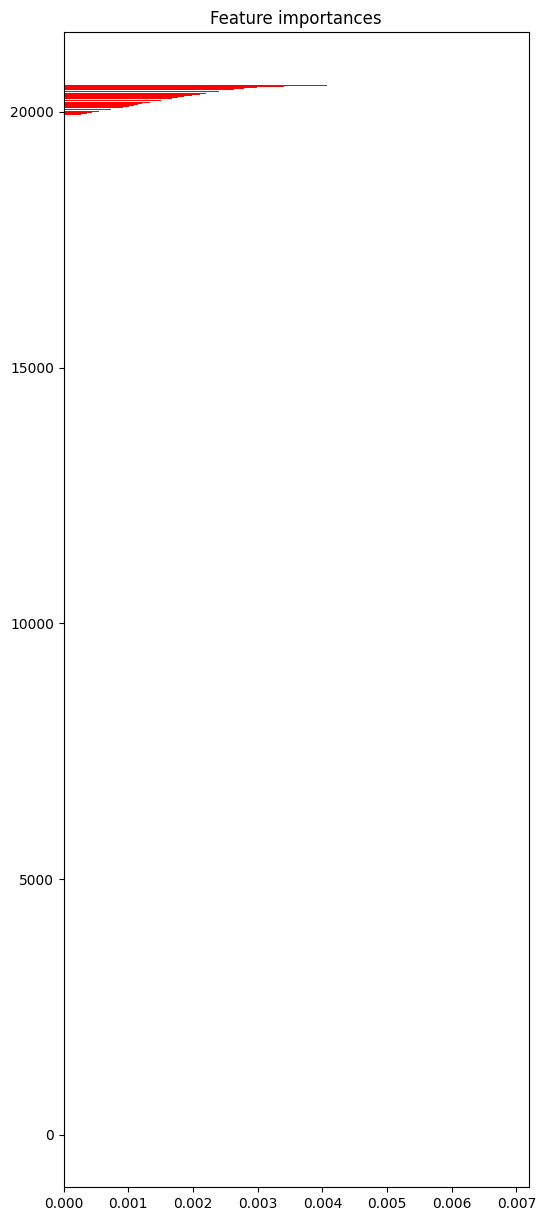

Matrice de foncfusion pour la forêêt aléatoire (en haut) et l'arbre de décision (en bas) : 


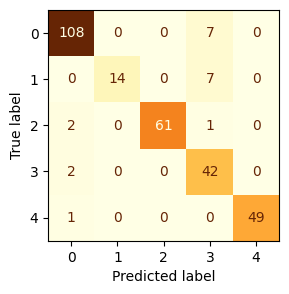

Accuracy :  0.932
F1-score BRCA:  0.933
precision_score BRCA:  0.943
recall_score:  0.932


In [ ]:
np.random.seed(nb_binome)
### Foret et bagging ------------------------------------------------------------
print("### Forêt ### ")

param_grid = {'max_depth':[3,4,5,10],
             'max_features':[3,4,5,10,15,20]}

rf = RandomForestClassifier()
search = GridSearchCV(rf,
                      param_grid,
                      scoring="f1",
                      cv=cv,
                      n_jobs=-1)
search.fit(X_train,y_train)
print('Meilleur modèle')
print(search.best_estimator_)

scoring=("accuracy","precision","recall","f1","roc_auc")

rf_best = search.best_estimator_
cv_scores = cross_validate(rf_best, X_train, y_train, cv=cv,scoring=scoring)

print("Performances de la foret aléatoire")
print("Accuracy  : ", np.round(np.mean(cv_scores["test_accuracy"]),2), "(",np.round(np.std(cv_scores["test_accuracy"]),2),")")
print("Precision : ", np.round(np.mean(cv_scores["test_precision"]),2), "(",np.round(np.std(cv_scores["test_precision"]),2),")")
print("Recall    : ", np.round(np.mean(cv_scores["test_recall"]),2), "(",np.round(np.std(cv_scores["test_recall"]),2),")")
print("F1-score  : ", np.round(np.mean(cv_scores["test_f1"]),2), "(",np.round(np.std(cv_scores["test_f1"]),2),")")
print("AUC       : ", np.round(np.mean(cv_scores["test_roc_auc"]),2), "(",np.round(np.std(cv_scores["test_roc_auc"]),2),")")

rf_best = search.best_estimator_
importances = rf_best.feature_importances_
indices = np.argsort(importances)

#Plot the feature importances of the forest
plt.figure(figsize=(6,15))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],       color="r", align="center")
plt.show()
plt.rcdefaults()
# # If you want to define your own labels,
# # change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), data.columns[indices])
#plt.ylim([-1, X.shape[1]])
#plt.savefig("RF_importances.png",format="png")
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay
y_pred_rf = rf_best.predict(X_test)

print("Matrice de confusion pour la forêt aléatoire (en haut) et l'arbre de décision (en bas) : ")


plt.rcParams.update({'figure.figsize': (3,3),'font.size': 10})
conf_mat =  confusion_matrix(y_test,y_pred_rf)
ConfusionMatrixDisplay(conf_mat).plot(cmap='YlOrBr',colorbar=False)
plt.show()
plt.rcdefaults()


print("Accuracy : ",np.round(accuracy_score(y_test,y_pred_rf),3))
print("F1-score BRCA: ",np.round(f1_score(y_test,y_pred_rf,average='weighted'),3))
print("precision_score BRCA: ",np.round(precision_score(y_test,y_pred_rf,average='weighted'),3))
print("recall_score: ",np.round(recall_score(y_test,y_pred_rf,average='weighted'),3))



In [ ]:
### Adaboost -------------------------------------------------------------------
pca = PCA(n_components=10)
pca.fit(X)
PC = pca.transform(X)

PC_train, PC_test, ypc_train, ypc_test = train_test_split(PC,label,test_size=0.7, random_state=42)


print("### Adaboost yeay ###")

param_grid = {
  'n_estimators': [300,400,500,200],
  'learning_rate' : [0.01,0.1,1]
  }
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3))
search = GridSearchCV(adaboost,
                      param_grid,
                      scoring="f1",
                      cv=cv,
                      n_jobs=-1)
search.fit(PC_train, ypc_train)
print('Meilleur modèle')
print(search.best_estimator_)

boost_best = search.best_estimator_

y_pred_boost = boost_best.predict(PC_test)
print("Confusion matrix  : ")
print(confusion_matrix(ypc_test,y_pred_boost))
print(' ')
print("Matrice de foncfusion pour le boosting (en haut) et l'arbre de décision (en bas) : ")
cm_boost = confusion_matrix(ypc_test,y_pred_boost,normalize='true')
print(' ')

plt.rcParams.update({'figure.figsize': (3,3),'font.size': 10})
conf_mat =  confusion_matrix(y_test,y_pred_boost)
ConfusionMatrixDisplay(conf_mat).plot(cmap='YlOrBr',colorbar=False)
plt.title("Boosting")
plt.show()
plt.rcdefaults()


print("Accuracy : ",np.round(accuracy_score(y_test,y_pred_boost),3))
print("F1-score BRCA: ",np.round(f1_score(y_test,y_pred_boost,average='weighted'),3))
print("precision_score BRCA: ",np.round(precision_score(y_test,y_pred_boost,average='weighted'),3))
print("recall_score: ",np.round(recall_score(y_test,y_pred_boost,average='weighted'),3))







#### Refaire la meme chose mais avec que deux classes par exemple prendre BRCA
#pour 1 et les autres 0

### données ---------------------------------------------------------------------
Y=[]
for i in label:
    if i =='BRCA': Y.append('BRCA')
    else: Y.append('OTHER')
print(Y)

d = {'X0': X[:,3], 'X1': X[:,6876], 'Label':Y}
df = pd.DataFrame(data=d)

sns.scatterplot(x="X0",y="X1",hue="Label",data = df)

## repartition
plt.figure()
sns.countplot(Y,palette="Blues_d")
plt.show()

#ACP -------------------------------------------------------------------------------
pca = PCA(n_components=2)
pca.fit(X)

PC = pca.transform(X)
print(PC.shape)
print(label.shape)

d = {'PC1': PC[:,0], 'PC2': PC[:,1], 'Label':Y}
df = pd.DataFrame(data=d)

sns.scatterplot(x="PC1",y="PC2",hue="Label",data = df)

### LDA ---------------------------------------------------------------------------

print(' \n #### LDA SUR LES 2 CLASSES #### \n')
lda = LinearDiscriminantAnalysis()
lda.fit(X,Y)#
yhat = lda.predict(X)#
errl=sum(Y!=yhat)/len(label) #
print("Taux d'erreur: ",round(errl,3))
plt.rcParams.update({'figure.figsize': (3,3),'font.size': 10})
conf_mat =  confusion_matrix(Y,yhat) #
ConfusionMatrixDisplay(conf_mat).plot(cmap='YlOrBr',colorbar=False)
plt.show()
plt.rcdefaults()

score=cross_val_score(lda, X,Y,cv=10) #
print("taux de bien prédits en moyenne:",np.mean(score))

### Sur echantillon train/test


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=42)

print("la taille de l'echantillon d'entraienement est", 0.3*len(Y))
print("la taille de l'echantillon d'entraienement est", 0.7*len(Y))
print(' \n #### LDA SUR LES 2 CLASSES (train/test) #### \n')
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)#
yhat = lda.predict(X_test)#
errl=sum(Y_test!=yhat)/len(Y_test) #
print("Taux d'erreur: ",round(errl,3))
plt.rcParams.update({'figure.figsize': (3,3),'font.size': 10})
conf_mat =  confusion_matrix(Y_test,yhat) #
ConfusionMatrixDisplay(conf_mat).plot(cmap='YlOrBr',colorbar=False)
plt.show()
plt.rcdefaults()

score=cross_val_score(lda, X_test,Y_test,cv=10) #
print("taux de bien prédits en moyenne:",np.mean(score))


###• KPPV ----------------------------------------------------------------------

print('### KPPV ####')
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_sc,Y_train)
y_pred = knn.predict(X_test_sc)

print("Confusion matrix : ")
print(confusion_matrix(Y_test[:],y_pred[:]))

from sklearn.metrics import f1_score
print("Accuracy : ",np.round(accuracy_score(Y_test,y_pred),3))
print("F1-score : ",np.round(f1_score(Y_test,y_pred,pos_label="BRCA"),3))

from sklearn.metrics import RocCurveDisplay
n0 = 1000
from sklearn.metrics import roc_curve
y_score = y_pred = knn.predict_proba(X_test_sc[:,:])
fpr, tpr, _ = roc_curve(y_test[:], y_score[:,0], pos_label=knn.classes_[0])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('courbe ROC '+str(knn.classes_[0]))

# selection du meilleur nb de voisin
n_neighbors = [1,3,5,10,20]
res = []
for nn in n_neighbors:
   res.append(cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=nn),X_train_sc, Y_train,cv = 3,n_jobs = -1))
np.array(res)
print("Erreurs moyennes : ", np.mean(np.array(res),axis=1))
print("Ecart-types des erreurs : ", np.std(np.array(res),axis=1))

### meilleur c'est 5

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc,Y_train)
y_pred = knn.predict(X_test_sc)

print("Confusion matrix : ")
print(confusion_matrix(Y_test[:],y_pred[:]))

cm_knn = confusion_matrix(Y_test,y_pred)
print(np.round(cm,2))
print(' ')


plt.rcParams.update({'figure.figsize': (3,3),'font.size': 10})
conf_mat =  confusion_matrix(Y_test,y_pred) #
ConfusionMatrixDisplay(conf_mat).plot(cmap='YlOrBr',colorbar=False)
plt.show()
plt.rcdefaults()


print("Accuracy : ",np.round(accuracy_score(Y_test,y_pred),3))
print("F1-score BRCA: ",np.round(f1_score(Y_test,y_pred,average='weighted',pos_label="'BRCA'"),3))
print("precision_score BRCA: ",np.round(precision_score(Y_test,y_pred,average='weighted',pos_label="'BRCA'"),3))
print("recall_score: ",np.round(recall_score(Y_test,y_pred,average='weighted',pos_label="'BRCA'"),3))

score=cross_val_score(knn, X_test,Y_test,cv=10) #
print("taux de bien prédits en moyenne:",np.mean(score))

### Arbre -------------------------------------------------------------------------

print("### ARBRE POUR DEUX CLASSES ###")
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, Y_train)

plt.figure(figsize=(30,30))
plot_tree(clf,filled=True, feature_names=data_origine[0,1:])
plt.show()

y_pred_clf = clf.predict(X_test)
# print("Confusion matrix (proportions) : ")
# print(confusion_matrix(Y_test,y_pred_clf,normalize='True'))
# print(' ')
print("Confusion matrix : ")
cm = confusion_matrix(Y_test,y_pred_clf)
print(np.round(cm,2))
print(' ')

plt.rcParams.update({'figure.figsize': (3,3),'font.size': 10})
conf_mat =  confusion_matrix(Y_test,y_pred_clf)
ConfusionMatrixDisplay(conf_mat).plot(cmap='YlOrBr',colorbar=False)
plt.show()
plt.rcdefaults()

print("Accuracy : ",np.round(accuracy_score(Y_test,y_pred_clf),3))
print("F1-score BRCA: ",np.round(f1_score(Y_test,y_pred_clf,average='weighted',pos_label="'BRCA'"),3))
print("precision_score BRCA: ",np.round(precision_score(Y_test,y_pred_clf,average='weighted',pos_label="'BRCA'"),3))
print("recall_score: ",np.round(recall_score(Y_test,y_pred_clf,average='weighted',pos_label="'BRCA'"),3))

score=cross_val_score(clf, X_test,Y_test,cv=10) #
print("taux de bien prédits en moyenne:",np.mean(score))


d = {'X0': X[:,3], 'X1': X[:,6876], 'Label':label}
df = pd.DataFrame(data=d)

sns.scatterplot(x="X0",y="X1",hue="Label",data = df)

## gridseachcv
Y01=[]
for i in Y:
    if i == 'BRCA': Y01.append(1)
    else: Y01.append(0)

X_train, X_test, Y01_train, Y01_test = train_test_split(X,Y01,test_size=0.7, random_state=42)


B = 15
cv = ShuffleSplit(n_splits=B,
                  test_size=0.3,
                  random_state=0)

param_grid = {'max_depth':[1,2,3,4,5,6,7,8],
             'min_samples_leaf':[1,2,3,4,5,6,7,8],
             'splitter' : ['best', 'random'],
             'max_features' : [1,2,3,4,5,6,7,8]}
clf = DecisionTreeClassifier()
search = GridSearchCV(clf,
                      param_grid,
                      scoring="accuracy",
                      cv=cv,
                      n_jobs=-1)
search.fit(X_train, Y_train)
print('Meilleur modèle')
print(search.best_estimator_)

scoring=("accuracy","precision","recall","f1","roc_auc")

tree = search.best_estimator_

plt.figure(figsize=(30,30))
plot_tree(tree,filled=True, feature_names=data_origine[0,1:])
plt.show()
plt.rcdefaults()


y_pred_tree = tree.predict(X_test)
print("Confusion matrix  : ")
print(confusion_matrix(Y_test,y_pred_tree))
print(' ')
print("Confusion matrix (proportions) : ")
cm = confusion_matrix(Y_test,y_pred_tree,normalize='true')
print(np.round(cm,2))
print(' ')

y_proba = tree.predict_proba(X_test)

plt.rcParams.update({'figure.figsize': (3,3),'font.size': 10})
conf_mat =  confusion_matrix(Y_test,y_pred_tree)
ConfusionMatrixDisplay(conf_mat).plot(cmap='YlOrBr',colorbar=False)
plt.show()
plt.rcdefaults()

print("Accuracy : ",np.round(accuracy_score(Y_test,y_pred_tree),3))
print("F1-score BRCA: ",np.round(f1_score(Y_test,y_pred_tree,average='weighted',pos_label="'BRCA'"),3))
print("precision_score BRCA: ",np.round(precision_score(Y_test,y_pred_tree,average='weighted',pos_label="'BRCA'"),3))
print("recall_score: ",np.round(recall_score(Y_test,y_pred_tree,average='weighted',pos_label="'BRCA'"),3))

score=cross_val_score(tree, X_test,Y_test,cv=10) #
print("taux de bien prédits en moyenne:",np.mean(score))

#### FOret aleatoire ------------------------------------------------------------


param_grid = {'max_depth':[3,4,5,10],
             'max_features':[3,5,10,15,20]}

rf = RandomForestClassifier()
search = GridSearchCV(rf,
                       param_grid,
                       scoring="f1",
                       cv=cv,
                       n_jobs=-1)
search.fit(X_train,Y_train)
print('Meilleur modèle')
print(search.best_estimator_)


rf_best = search.best_estimator_
cv_scores = cross_validate(rf_best, X_train, y_train, cv=cv,scoring=scoring)

print("Performances de la foret aléatoire")
print("Accuracy  : ", np.round(np.mean(cv_scores["test_accuracy"]),2), "(",np.round(np.std(cv_scores["test_accuracy"]),2),")")
print("Precision : ", np.round(np.mean(cv_scores["test_precision"]),2), "(",np.round(np.std(cv_scores["test_precision"]),2),")")
print("Recall    : ", np.round(np.mean(cv_scores["test_recall"]),2), "(",np.round(np.std(cv_scores["test_recall"]),2),")")
print("F1-score  : ", np.round(np.mean(cv_scores["test_f1"]),2), "(",np.round(np.std(cv_scores["test_f1"]),2),")")
print("AUC       : ", np.round(np.mean(cv_scores["test_roc_auc"]),2), "(",np.round(np.std(cv_scores["test_roc_auc"]),2),")")

rf_best = search.best_estimator_
importances = rf_best.feature_importances_
indices = np.argsort(importances)

#Plot the feature importances of the forest
plt.figure(figsize=(6,15))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],color="r", align="center")
plt.show()
plt.rcdefaults()
# # # If you want to define your own labels,
# # # change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), data.columns[indices])
#plt.ylim([-1, X.shape[1]])
#plt.savefig("RF_importances.png",format="png")
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay
y_pred_rf = rf_best.predict(X_test)

print("Matrice de foncfusion pour la forêêt aléatoire (en haut) et l'arbre de décision (en bas) : ")
cm_rf = confusion_matrix(Y_test,y_pred_rf,normalize='true')

ConfusionMatrixDisplay(cm_rf).plot()
plt.title("Random Forest")

plt.rcParams.update({'figure.figsize': (3,3),'font.size': 10})
conf_mat =  confusion_matrix(Y_test,y_pred_rf)
ConfusionMatrixDisplay(conf_mat).plot(cmap='YlOrBr',colorbar=False)
plt.show()
plt.rcdefaults()


print("Accuracy : ",np.round(accuracy_score(Y_test,y_pred_rf),3))
print("F1-score BRCA: ",np.round(f1_score(Y_test,y_pred_rf,average='weighted',pos_label="'BRCA'"),3))
print("precision_score BRCA: ",np.round(precision_score(Y_test,y_pred_rf,average='weighted',pos_label="'BRCA'"),3))
print("recall_score: ",np.round(recall_score(Y_test,y_pred_rf,average='weighted',pos_label="'BRCA'"),3))

score=cross_val_score(rf, X_test,Y_test,cv=10) #
print("taux de bien prédits en moyenne:",np.mean(score))

### Adaboost ---------------------------------------------------------------------

pca = PCA(n_components=10)
pca.fit(X)
PC = pca.transform(X)

PC_train, PC_test, ypc_train, ypc_test = train_test_split(PC,Y,test_size=0.7, random_state=42)


print("### Adaboost yeay ###")

param_grid = {
  'n_estimators': [100,200,300,400],
  'learning_rate' : [0.01,0.1,1]
  }
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3))
search = GridSearchCV(adaboost,
                      param_grid,
                      scoring="f1",
                      cv=cv,
                      n_jobs=-1)
search.fit(PC_train, ypc_train)
print('Meilleur modèle')
print(search.best_estimator_)

boost_best = search.best_estimator_

y_pred_boost = boost_best.predict(PC_test)

plt.rcParams.update({'figure.figsize': (3,3),'font.size': 10})
conf_mat =  confusion_matrix(ypc_test,y_pred_boost)
ConfusionMatrixDisplay(conf_mat).plot(cmap='YlOrBr',colorbar=False)
plt.show()
plt.rcdefaults()

print("Accuracy : ",np.round(accuracy_score(ypc_test,y_pred_boost),3))
print("F1-score BRCA: ",np.round(f1_score(ypc_test,y_pred_boost,average='weighted',pos_label="'BRCA'"),3))
print("precision_score BRCA: ",np.round(precision_score(ypc_test,y_pred_boost,average='weighted',pos_label="'BRCA'"),3))
print("recall_score: ",np.round(recall_score(ypc_test,y_pred_boost,average='weighted',pos_label="'BRCA'"),3))

score=cross_val_score(boost_best, PC_test,Y_test,cv=10) #
print("taux de bien prédits en moyenne:",np.mean(score))